In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.14.0'

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
!nvidia-smi

Wed Nov 29 05:09:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from tensorflow import keras
dataset=tf.keras.datasets.mnist

In [8]:
(X_train,y_train),(X_test,y_test)=dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
y_test.shape

(10000,)

In [13]:
img=X_train[0]

In [14]:
img.shape

(28, 28)

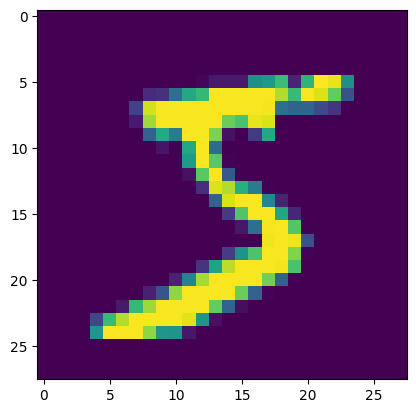

In [15]:
plt.imshow(img)

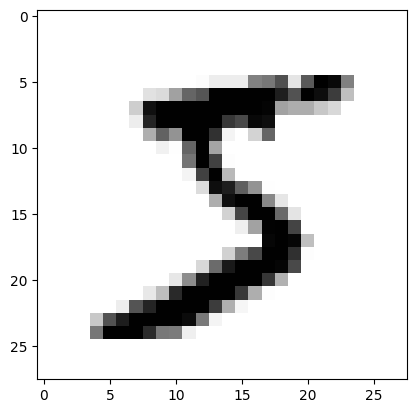

In [16]:
plt.imshow(img,cmap="binary")

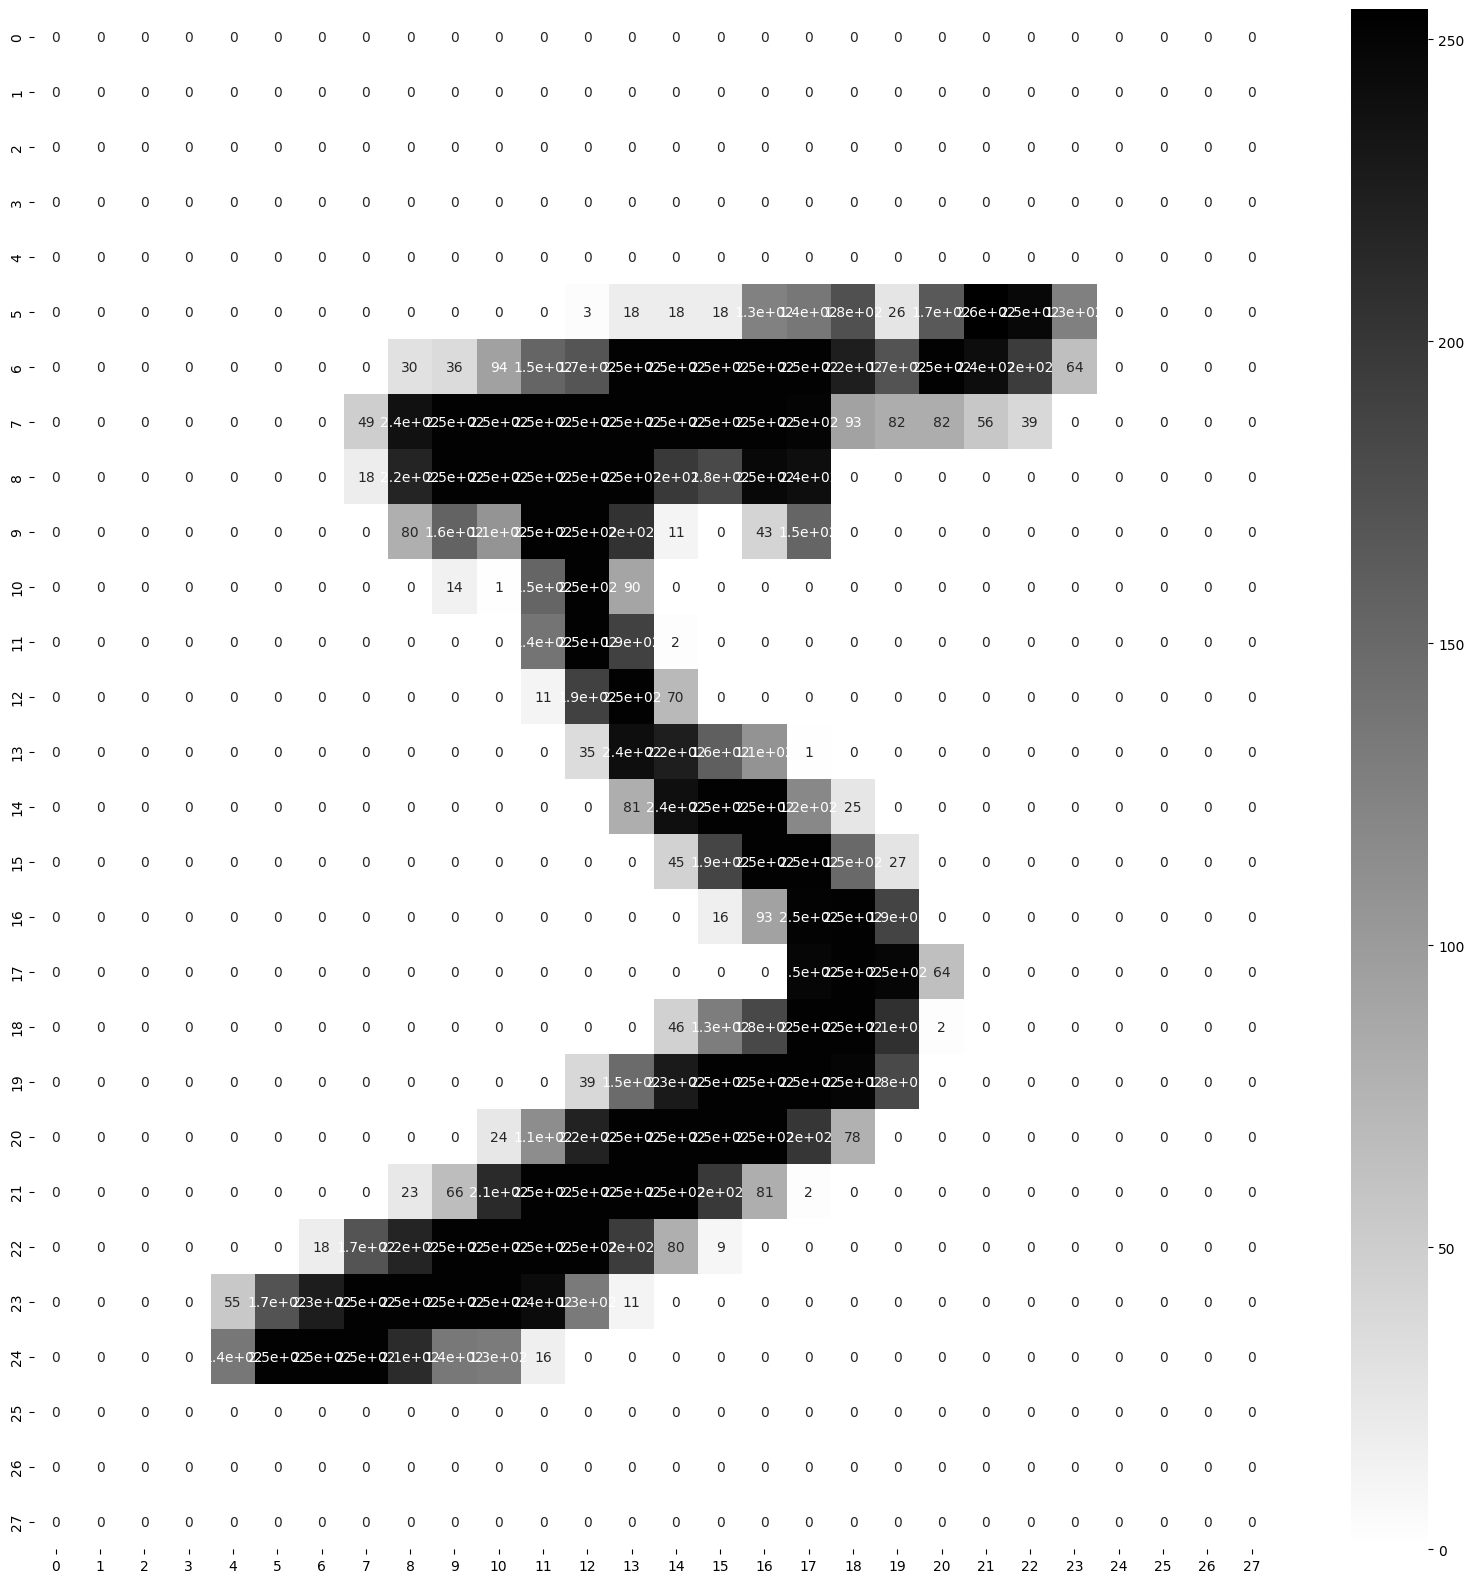

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(img,annot=True,cmap="binary")
plt.savefig("image.png")

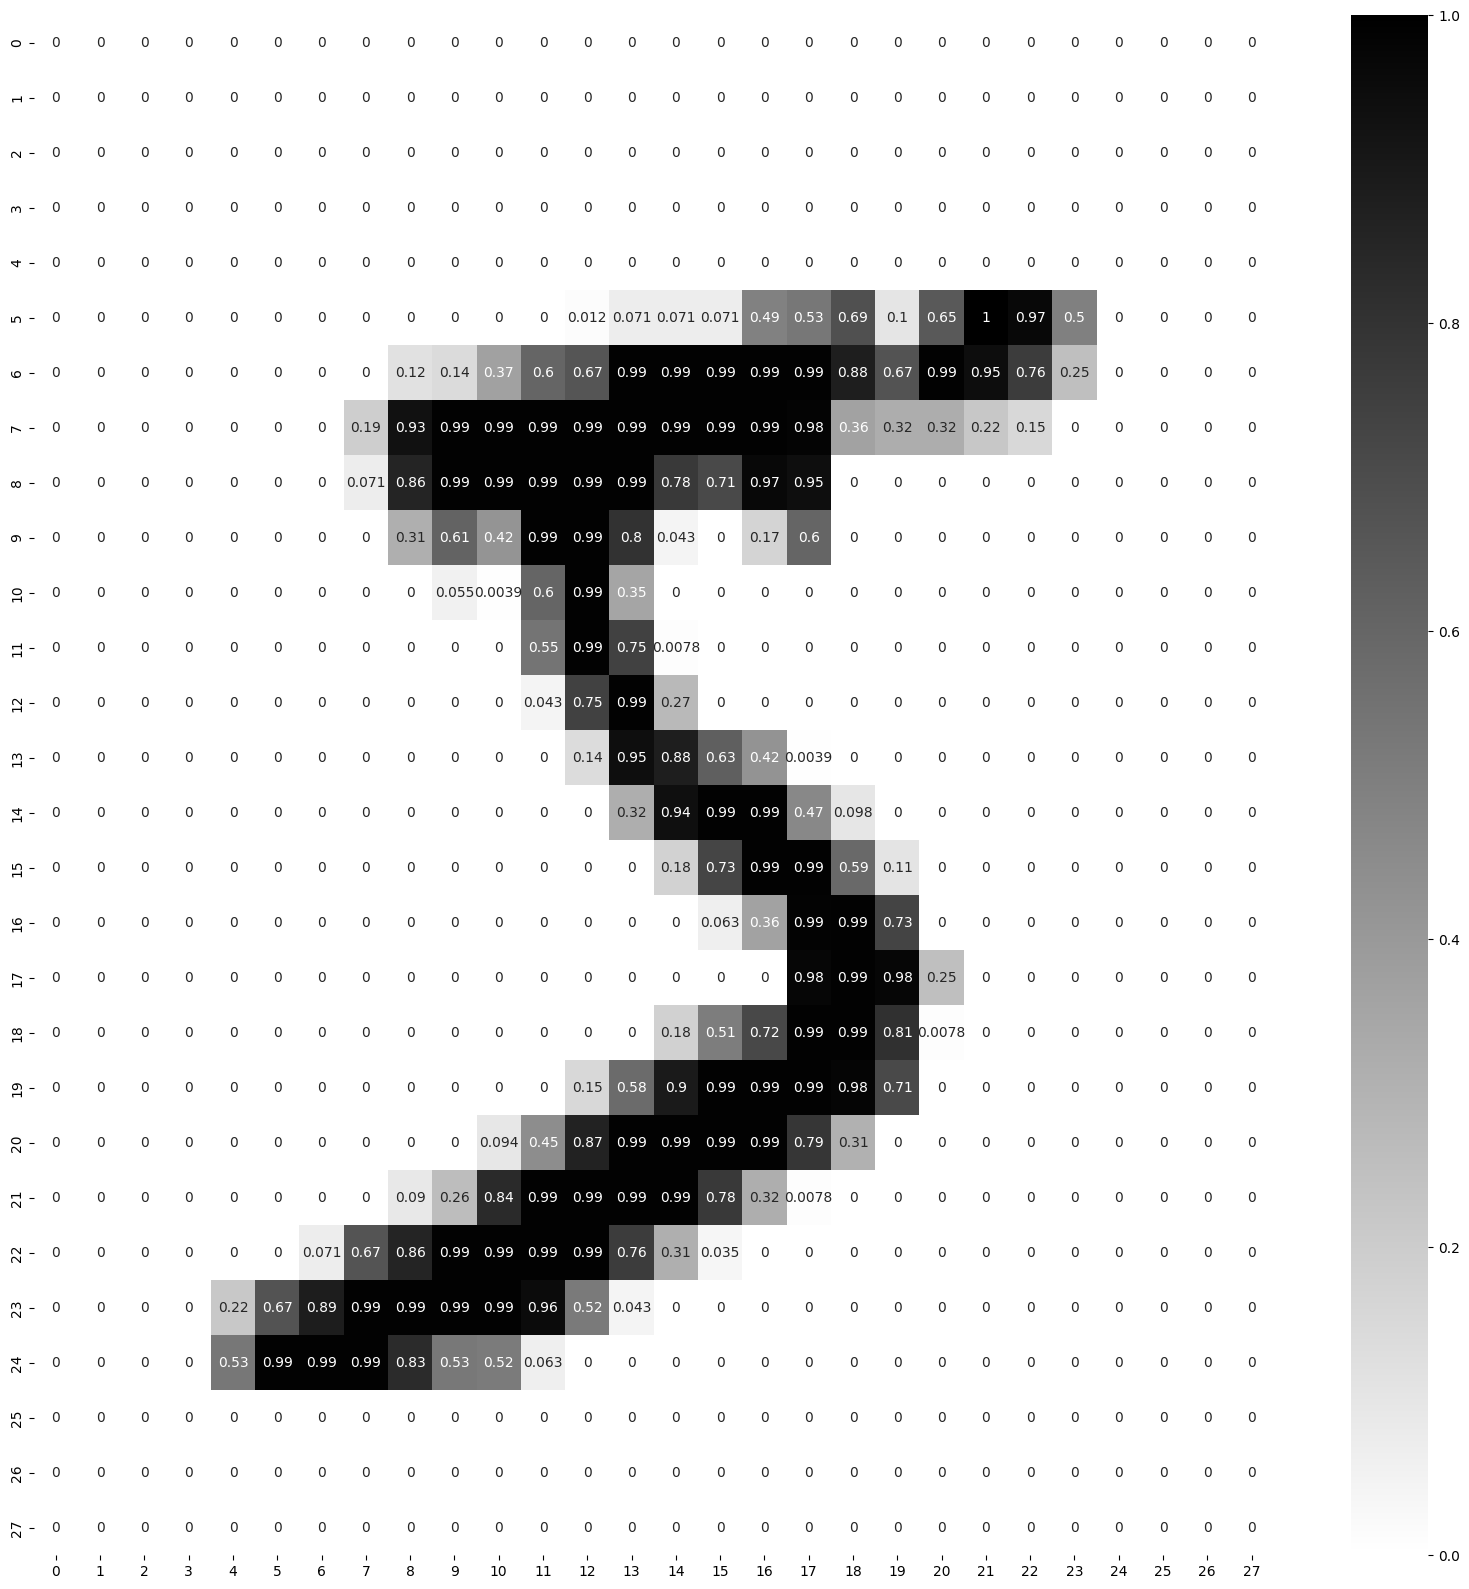

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap="binary")
plt.savefig("Normalized_image.png")

In [19]:
X_valid,X_trainset=X_train[:5000]/255,X_train[5000:]/255
y_valid,y_trainset=y_train[:5000],y_train[5000:]
X_test=X_test/255

In [21]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=(28,28),name="inputLayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")
]

In [22]:
modelClassifier=tf.keras.models.Sequential(LAYERS)

In [23]:
modelClassifier.layers

In [24]:
modelClassifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
weights,biases=modelClassifier.layers[1].get_weights()

In [26]:
weights.shape

(784, 300)

In [27]:
biases.shape

(300,)

In [28]:
weights

array([[ 0.02411249,  0.00292584,  0.02905799, ...,  0.0416145 ,
         0.06357801, -0.0514087 ],
       [-0.0659031 , -0.04673806,  0.05315733, ..., -0.07276168,
         0.04610464,  0.02566866],
       [ 0.01374655, -0.05522995,  0.03543746, ..., -0.05212575,
        -0.01156487,  0.01330119],
       ...,
       [-0.02020487, -0.04338358, -0.0501108 , ...,  0.02549508,
        -0.04856392, -0.06544374],
       [-0.01517519, -0.07397031, -0.04846693, ...,  0.05238709,
         0.0686155 ,  0.03550366],
       [-0.04174116, -0.00296675,  0.04858987, ..., -0.02836127,
        -0.05361937,  0.01634703]], dtype=float32)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
lossFunction="sparse_categorical_crossentropy"
optimizers="SGD"
metrics=["accuracy"]

In [33]:
modelClassifier.compile(loss=lossFunction,optimizer=optimizers,metrics=metrics)

In [34]:
EPOCHS=30
validation=(X_valid,y_valid)
history=modelClassifier.fit(X_trainset,y_trainset,epochs=EPOCHS,validation_data=validation)

Epoch 1/30
1719/1719 [==============================] - 12s 4ms/step - loss: 0.6225 - accuracy: 0.8380 - val_loss: 0.3066 - val_accuracy: 0.9174
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2873 - accuracy: 0.9180 - val_loss: 0.2372 - val_accuracy: 0.9372
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2338 - accuracy: 0.9331 - val_loss: 0.2023 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1992 - accuracy: 0.9427 - val_loss: 0.1818 - val_accuracy: 0.9506
Epoch 5/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.1740 - accuracy: 0.9494 - val_loss: 0.1587 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1543 - accuracy: 0.9553 - val_loss: 0.1412 - val_accuracy: 0.9626
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1381 - accuracy: 0.9598 - val_loss: 0.1315 - val_accur

In [35]:
modelClassifier.save("classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
X_pred=X_test[:4]
y_prob=modelClassifier.predict(X_pred)
y_prob.round(2)

1/1 [==============================] - 0s 124ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

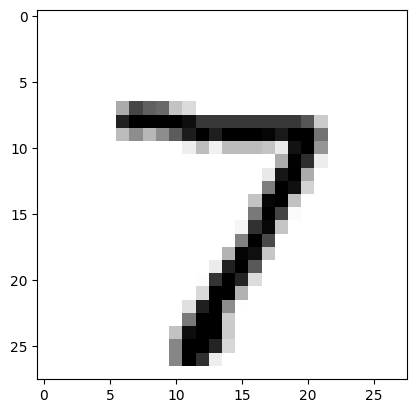

In [37]:
plt.imshow(X_pred[0],cmap="binary")

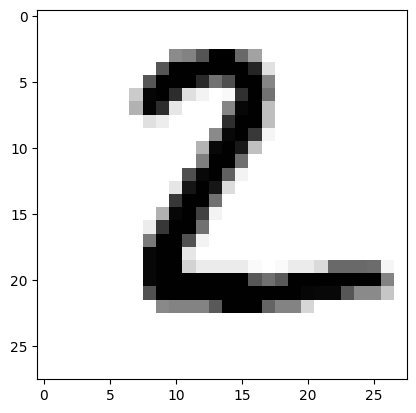

In [38]:
plt.imshow(X_pred[1],cmap="binary")

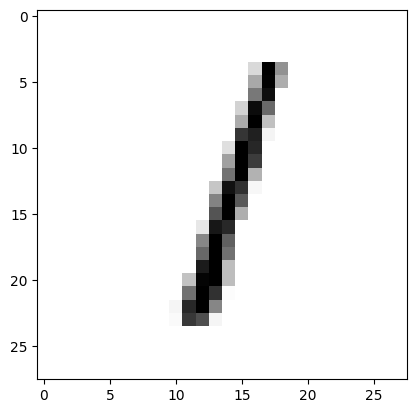

In [39]:
plt.imshow(X_pred[2],cmap="binary")

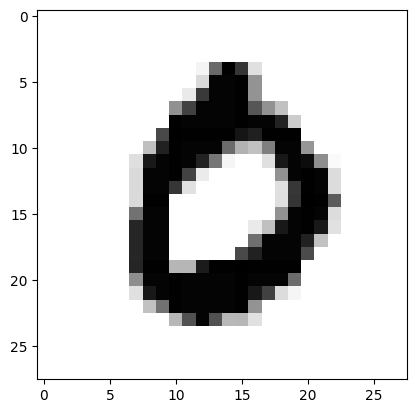

In [40]:
plt.imshow(X_pred[3],cmap="binary")